<a href="https://colab.research.google.com/github/sahilaf/Ai-lab/blob/main/Kaggle_com(score-0.22222)dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accuracy **score** 0.222222

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [112]:
# Sample data (replace with actual dataset)
data = pd.read_csv("/content/dataset.csv")
data.head()

,ID,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
0,0,Male,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,positive
1,1,Male,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,positive
2,2,Male,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,negative
3,3,Female,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,negative
4,4,Male,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,negative


In [113]:
# Encode categorical variables
# Assuming 'Gender' and 'Result' are categorical columns
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male: 0, Female: 1
data['Result'] = label_encoder.fit_transform(data['Result'])  # Negative: 0, Positive: 1

In [114]:
data.head()

,ID,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
0,0,1,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,1
1,1,1,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,1
2,2,1,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,0
3,3,0,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,0
4,4,1,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,0


In [115]:
import numpy as np

X = data.drop(columns=["Result","ID"])
y = data["Result"]


In [116]:
y.value_counts()

,count
Result,
1,970
0,430


<Axes: ylabel='count'>

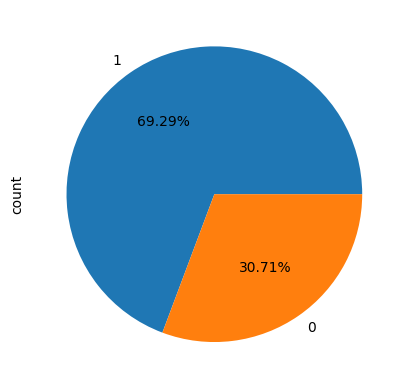

In [117]:
y.value_counts().plot.pie(autopct='%.2f%%')

In [118]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = data[data['Result'] == 1]
minority_class = data[data['Result'] == 0]

# Undersample the majority class
majority_undersampled = resample(
    majority_class,
    replace=False,         # Sample without replacement
    n_samples=430,         # Match the size of the minority class
    random_state=42        # For reproducibility
)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([majority_undersampled, minority_class])

# Shuffle the resulting dataset
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(undersampled_data['Result'].value_counts())

# Prepare features and labels
X = undersampled_data.drop(columns=["Result", "ID"])
y = undersampled_data["Result"]


Result
0    430
1    430
Name: count, dtype: int64


In [124]:
# Prepare features and labels
X = undersampled_data.drop(columns=["Result", "ID"])
y = undersampled_data["Result"]

# Check if the number of rows matches
assert X.shape[0] == y.shape[0], "Mismatch in the number of rows between X and y"

# Print to confirm
print(f"X rows: {X.shape[0]}, y rows: {y.shape[0]}")


X rows: 860, y rows: 860


In [125]:
print(X.isna().sum())  # Check for NaN in X
print(y.isna().sum())  # Check for NaN in y


Gender                         0
Age                            0
Hemoglobin(g/dl)               0
Neutrophils(%)                 0
Lymphocytes(%)                 0
Monocytes(%)                   0
Eosinophils(%)                 0
RBC                            0
HCT(%)                         0
MCV(fl)                        0
MCH(pg)                        0
MCHC(g/dl)                     0
RDW-CV(%)                      0
Total Platelet Count(/cumm)    0
MPV(fl)                        0
PDW(%)                         0
PCT(%)                         0
Total WBC count(/cumm)         0
dtype: int64
0


In [126]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split data into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Split the temporary data into testing (20%) and validation (10%)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
X_valid_normalized = scaler.transform(X_valid)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_model.fit(X_train_normalized, y_train)

# Evaluate on training, testing, and validation sets
train_predictions = logistic_model.predict(X_train_normalized)
test_predictions = logistic_model.predict(X_test_normalized)
valid_predictions = logistic_model.predict(X_valid_normalized)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
valid_accuracy = accuracy_score(y_valid, valid_predictions)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")


Training Accuracy: 0.6346
Testing Accuracy: 0.6047
Validation Accuracy: 0.6395


In [135]:
# Load the test dataset (assuming test_dataset is provided as a CSV)
test_file_path = "/content/test_dataset.csv"  # Replace with your test dataset file path
test_data = pd.read_csv(test_file_path)

# Check for any unnamed columns or index columns and drop them
test_data = test_data.loc[:, ~test_data.columns.str.contains('^Unnamed')]  # Drop unnamed columns

# If necessary, encode the categorical variables in the test set the same way as the training set
if 'Gender' in test_data.columns:  # Example of categorical encoding
    test_data['Gender'] = label_encoder.fit_transform(test_data['Gender'])  # Ensure consistent encoding

# Separate the features (X) for prediction (ensure the same features as the training set)
X_test_data = test_data.drop('ID', axis=1)  # Drop 'ID' as it is not a feature used for prediction

# Standardize the numerical features based on the training set scaler
X_test_data_normalized = scaler.transform(X_test_data)  # Use transform instead of fit_transform to avoid data leakage

# Make predictions on the test dataset
test_predictions = logistic_model.predict(X_test_data_normalized)

# Create a DataFrame to save the results with ID and predicted target
test_results = test_data[['ID']].copy()  # Assuming 'ID' column exists in the test dataset
test_results['Predicted_Result'] = test_predictions  # Add predictions as the target column

# Save the results to a CSV file
output_file_path = "/content/predicted_results.csv"  # Specify your output file path
test_results.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")


Predictions saved to /content/predicted_results.csv
